In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [8]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 15

train_dir = r"train"
test_dir  = r"test"

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 4000 images belonging to 8 classes.
Found 4000 images belonging to 8 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,672 (12.61 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.3243 - loss: 1.7203 - val_accuracy: 0.6848 - val_loss: 0.9829
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.5980 - loss: 1.0869 - val_accuracy: 0.6405 - val_loss: 0.8511
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.6963 - loss: 0.8280 - val_accuracy: 0.8575 - val_loss: 0.4732
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.7653 - loss: 0.6361 - val_accuracy: 0.9110 - val_loss: 0.3028
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.7990 - loss: 0.5492 - val_accuracy: 0.8410 - val_loss: 0.4260
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - accuracy: 0.8447 - loss: 0.4387 - val_accuracy: 0.8770 - val_loss: 0.2937
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.8543 - loss: 0.4111 - val_accuracy: 0.9233 - val_loss: 0.2251
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.8702 - loss: 0.3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class index: 0
Class labels: {'Anthracnose': 0, 'Bacterial Canker': 1, 'Cutting Weevil': 2, 'Die Back': 3, 'Gall Midge': 4, 'Healthy': 5, 'Powdery Mildew': 6, 'Sooty Mould': 7}


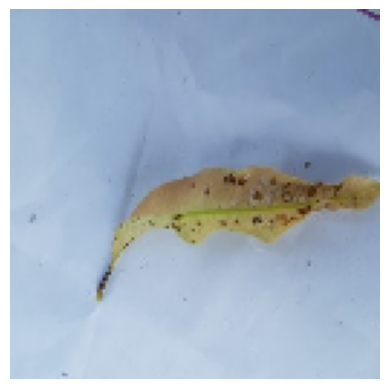

In [15]:
from tensorflow.keras.preprocessing import image

img_path = r"test\Anthracnose\20211008_124457 (Custom).jpg"

img = image.load_img(img_path, target_size=(128,128))
plt.imshow(img)
plt.axis('off')

img = image.img_to_array(img)/255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_index = np.argmax(prediction)

print("Predicted class index:", class_index)
print("Class labels:", train_data.class_indices)



In [16]:
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

print("Prediction array:", prediction)
print("Predicted class index:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction array: [[9.9953353e-01 1.6571723e-05 9.5024967e-05 2.9633532e-04 2.0413685e-05
  3.2152765e-09 3.8118254e-05 8.3485034e-08]]
Predicted class index: 0
